In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
import seaborn as sns

In [3]:
df_DA_US = df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

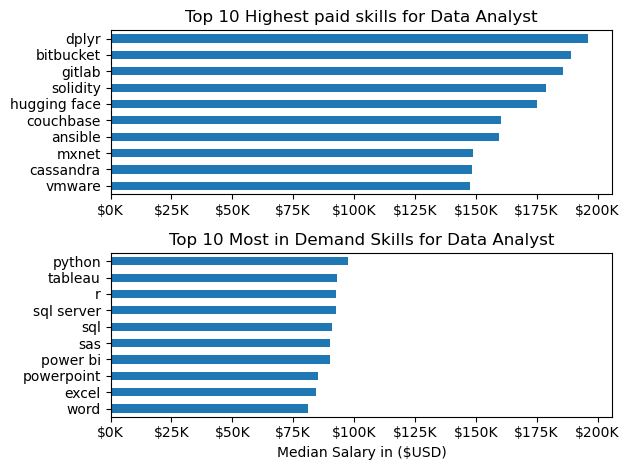

In [4]:
df_DA_US = df_DA_US.explode('job_skills') 

df_DA_US[['salary_year_avg','job_skills']] 
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']) 

df_DA__top_pay = df_DA_US_group.sort_values(by='median',ascending=False).head(10) 
df_DA_skills = df_DA_US_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False) 
df_DA_skills 
fig,ax =plt.subplots(2,1) 

df_DA__top_pay[::-1].plot(kind='barh',y='median',ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest paid skills for Data Analyst') 
ax[0].set_xlabel('') 
ax[0].set_ylabel('') 
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K')) 

df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False) 
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].set_title('Top 10 Most in Demand Skills for Data Analyst') 
ax[1].set_xlabel('Median Salary in ($USD)') 
ax[1].set_ylabel('') 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K')) 

fig.tight_layout()

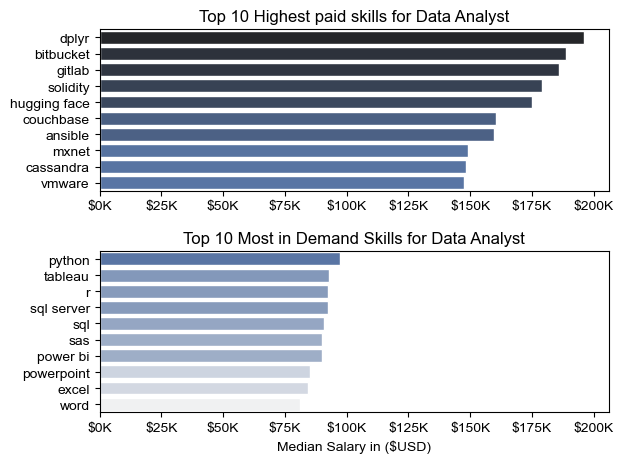

In [10]:
fig,ax =plt.subplots(2,1) 

sns.set_theme(style="ticks")

sns.barplot(data=df_DA__top_pay,x='median',y=df_DA__top_pay.index, ax=ax[0], hue='median', palette='dark:b_r')
ax[0].legend().remove()

#df_DA__top_pay[::-1].plot(kind='barh',y='median',ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest paid skills for Data Analyst') 
ax[0].set_xlabel('') 
ax[0].set_ylabel('') 
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K')) 

sns.barplot(data=df_DA_skills,x='median',y=df_DA_skills.index, ax=ax[1], hue='median',palette='light:b')
ax[1].legend().remove()

#df_DA_skills[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False) 
ax[1].set_xlim(ax[0].get_xlim()) 
ax[1].set_title('Top 10 Most in Demand Skills for Data Analyst') 
ax[1].set_xlabel('Median Salary in ($USD)') 
ax[1].set_ylabel('') 
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K')) 

fig.tight_layout()

Text(0, 0.5, 'Number of Jobs')

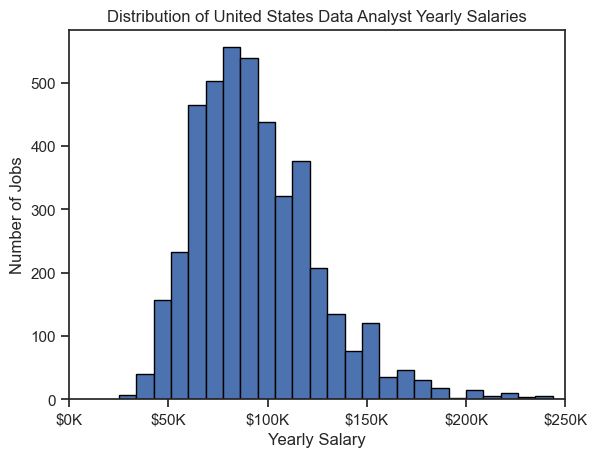

In [12]:
df_US_data = df[(df['job_title_short']== 'Data Analyst')&(df['job_country']=='United States')].copy()
df_US_data=df_US_data.dropna(subset=['salary_year_avg'])
df_US_data['salary_year_avg'].plot(kind='hist',bins=40, edgecolor='black')
plt.xlim(0,250000)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

Text(12.444444444444445, 0.5, 'Number of Jobs')

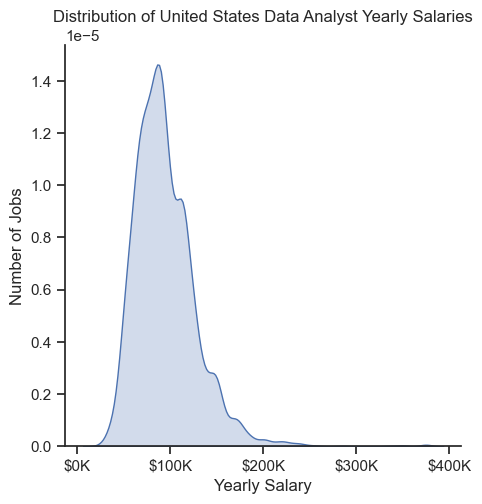

In [16]:
sns.set_theme(style="ticks")
sns.displot(df_US_data['salary_year_avg'], kind='kde',fill=True)

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))

plt.title('Distribution of United States Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

C:\Users\shyam\AppData\Local\Temp\ipykernel_55096\147647261.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles,vert=False)


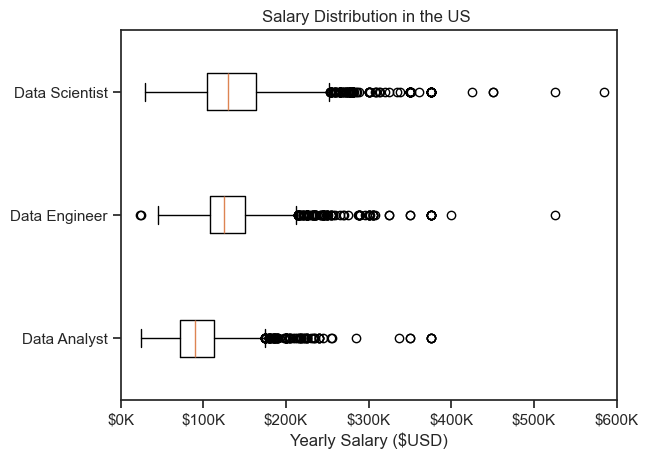

In [17]:
job_titles = ['Data Analyst','Data Engineer','Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list =[df_US[df_US['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels=job_titles,vert=False)
plt.title('Salary Distribution in the US ')
plt.xlabel('Yearly Salary ($USD)')


ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

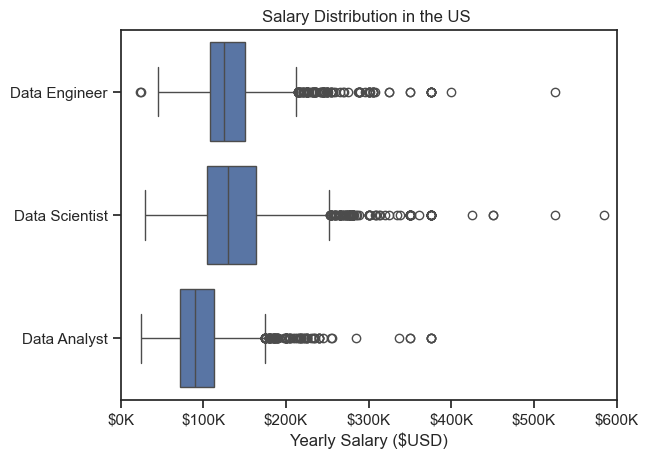

In [23]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')

plt.title('Salary Distribution in the US ')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

In [30]:
df_US_DS = df[(df['job_title_short']=='Data Scientist')& (df['job_country']=='United States')].copy()
df_US_DS = df_US_DS.dropna(subset=['salary_year_avg'])
top_companies = df_US_DS.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()


Text(0, 0.5, 'Company Name')

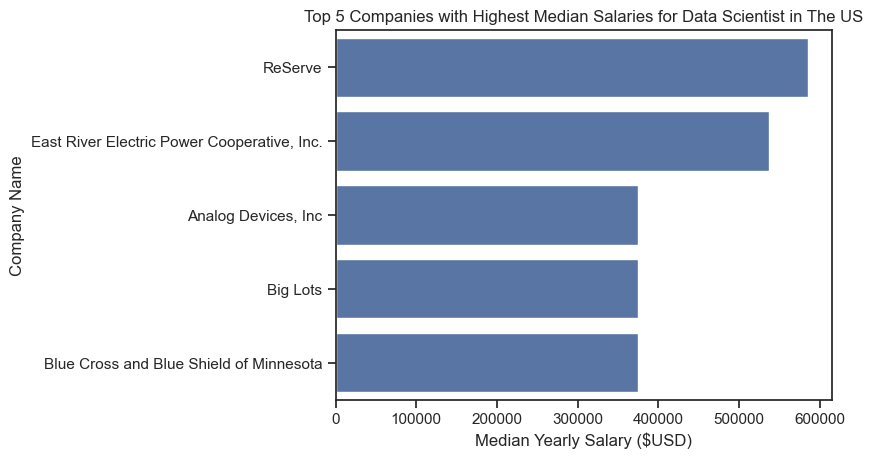

In [31]:
sns.barplot(data=top_companies, x='salary_year_avg', y='company_name')
plt.title('Top 5 Companies with Highest Median Salaries for Data Scientist in The US')
plt.xlabel('Median Yearly Salary ($USD)')
plt.ylabel('Company Name')

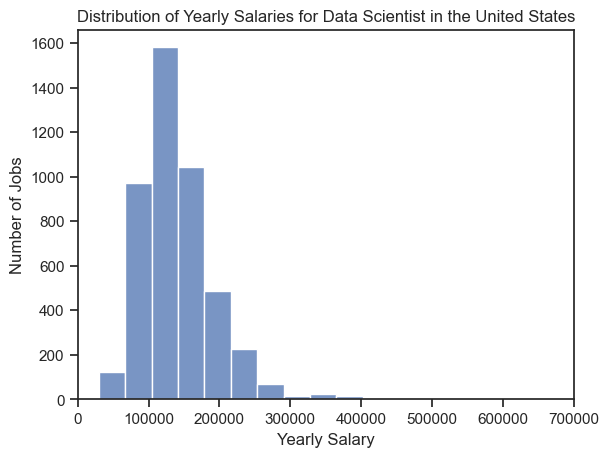

In [33]:
us_ds_jobs = df[(df['job_country']=='United States') & (df['job_title_short']=='Data Scientist')].dropna(subset=['salary_year_avg']).copy()
sns.histplot(us_ds_jobs['salary_year_avg'], bins=25,kde=False)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.xlim(0,700000)
plt.show()

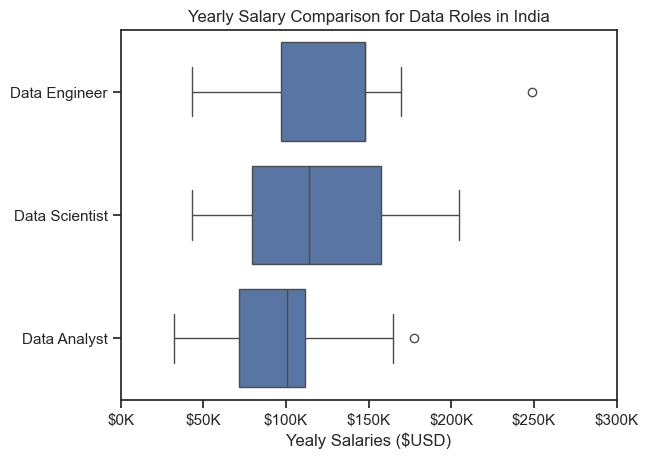

In [36]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
jobs_india = df[(df['job_country']=='India') & (df['job_title_short'].isin(job_titles))].dropna(subset=['salary_year_avg']).copy()
sns.boxplot(data=jobs_india, x='salary_year_avg', y='job_title_short')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yealy Salaries ($USD)')
plt.ylabel('')
plt.xlim(0,300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos:f'${int(x/1000)}K'))
plt.show()

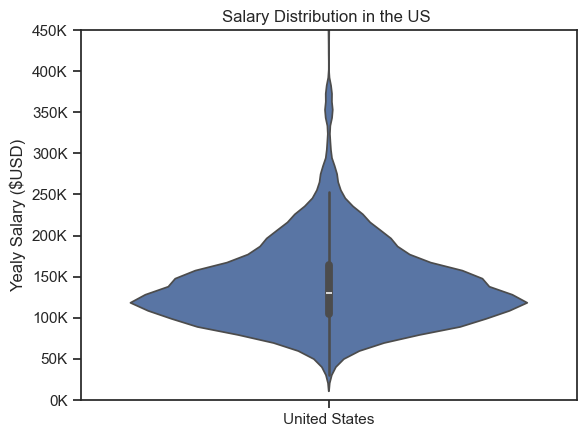

In [ ]:
df_DS_US = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].dropna(subset=['salary_year_avg']).copy()
sns.violinplot( x='job_country', y='salary_year_avg',data =df_DS_US )
plt.title('Salary Distribution in the US ')
plt.xlabel('')
plt.ylim(0,450000)
plt.ylabel('Yealy Salary ($USD)')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos:f'{int(y/1000)}K'))
plt.show()